In [4]:
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
import datetime as dt


Initial Shape:  (2974335, 49)
Deduplication Shape:  (2974335, 49)
No Duplicate Data Found


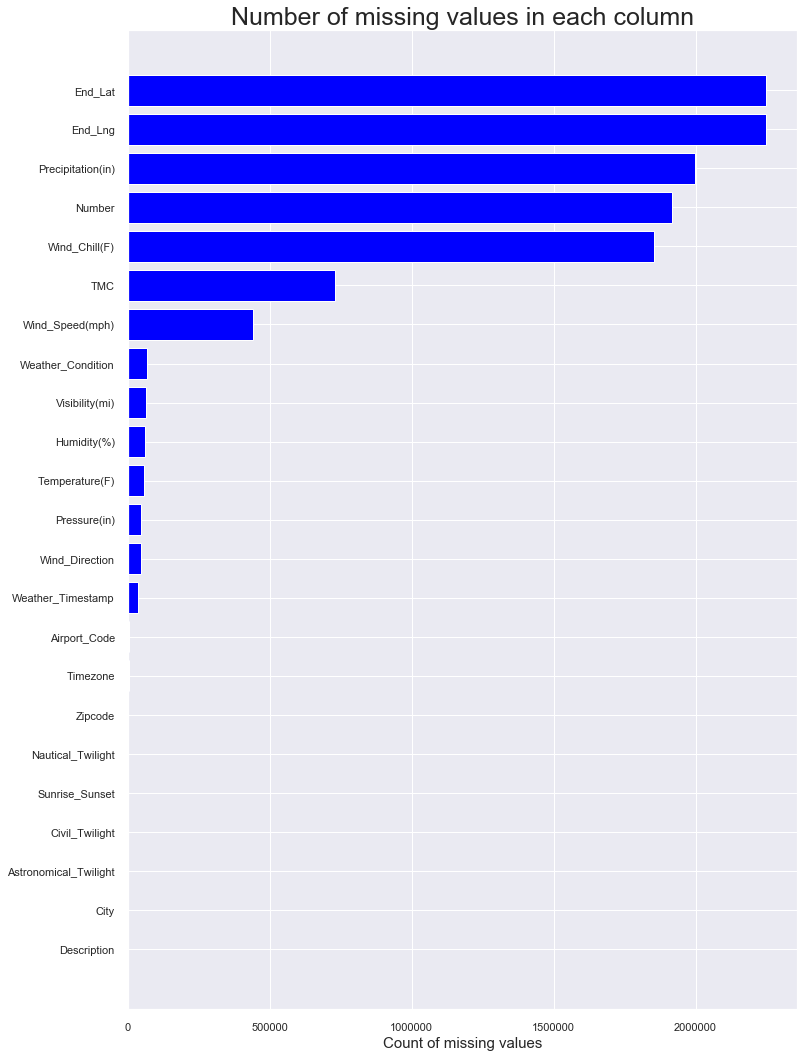

['MapQuest' 'MapQuest-Bing' 'Bing']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'W' 'NNW' 'NNE' 'S' 'N' 'VAR' 'SE'
 'SSE' 'ESE' 'E' 'NE' 'ENE' nan 'CALM']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974313 entries, 0 to 2974334
Data columns (total 62 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               float64       
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            

['Rainy' 'Cloudy' 'Snowy' 'Fog' 'Clear' 'Icy' nan 'Smoke' 'Ash'
 'Sand/Windy' 'Dust/Windy' 'Dust' 'Clear/Windy' 'Cloudy/Windy'
 'Rain/Windy' 'Tornado' 'Rain/Snow' 'Snow' 'Sand' 'Snow/Windy' 'Rain'
 'Icy/Snow' 'Icy/Windy' 'Fog/Windy' 'Smoke/Windy']


C:\Users\Allison\Miniconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



(298058, 50)
ID                                     object
Severity                              float64
Start_Time                     datetime64[ns]
End_Time                       datetime64[ns]
Start_Lat                             float64
Start_Lng                             float64
Distance(mi)                          float64
Side                                   object
City                                   object
County                                 object
Zipcode                                object
Country                                object
Timezone                               object
Airport_Code                           object
Temperature(F)                        float64
Wind_Chill(F)                         float64
Humidity(%)                           float64
Pressure(in)                          float64
Visibility(mi)                        float64
Wind_Direction                         object
Wind_Speed(mph)                       float64
Precipitation(in)   

In [5]:
#Run the initial EDA from the first lab for the project. 
#NOTE: We've commented out the graphs and analysis portions from the EDA just to make things run faster, hence the "Skinny"
#version of the filename
%run ./JB_AR_BC_SO_Project_3.ipynb

# Modeling and Evaluation

## Gaussian Mixed Model Clustering

### Overview

This method of clustering will use the Gaussian Mixed Model (GMM) approach. This approach is useful for data that can be represented by Gaussian distributions. We will be using continuous and binary variables normalized in our clustering. Additionally, we will allow a full covariance matrix to be calculated in order to capture the shape of our data the best. 

We will be clustering on over 20 variables so we will not be able to visualize every variable's shape with respect to all others. Instead, we will examine where the clusters occur in the state of Texas.

We chose the variables included based off of variables we found to be important in modeling severity, which itself is an important indicator of whether or not an accident requires top priority of resources and responders. These variables include both weather data and road characteristics, such as the presence of intersections.

In [6]:
# df_ungroupedSev.columns
# I am including weather data and important variables from Lab 2 for predicting severity 
# (mainly whether the accident occured near a junction of some kind)
# I will not be including Severity in the clustering since that is assessed at a later time, but want to look at it later
# I'm removing Distance(mi), Time Duration because I think it may be data leakage

# df = df_ungroupedSev[['Severity', 'Start_Lat', 'Start_Lng','Temperature(F)',
#                       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
#                       'Wind_Speed(mph)', 'Precipitation(in)','Crossing', 'Yield', 'Junction', 
#                       'Stop', 'Traffic_Signal',
#                       'Start_Hour', 'Start_Time', 'Side_L',
#                       'Start_Weekday_Fri', 'Start_Weekday_Mon', 'Start_Weekday_Sat',
#                       'Start_Weekday_Sun', 'Start_Weekday_Thu', 'Start_Weekday_Tue','Weather_Condition_Collapsed_Clear',
#        'Weather_Condition_Collapsed_Clear/Windy',
#        'Weather_Condition_Collapsed_Cloudy',
#        'Weather_Condition_Collapsed_Cloudy/Windy',
#        'Weather_Condition_Collapsed_Dust',
#        'Weather_Condition_Collapsed_Dust/Windy',
#        'Weather_Condition_Collapsed_Fog', 'Weather_Condition_Collapsed_Icy',
#        'Weather_Condition_Collapsed_Rain',
#        'Weather_Condition_Collapsed_Rain/Windy',
#        'Weather_Condition_Collapsed_Rainy', 'Weather_Condition_Collapsed_Sand',
#        'Weather_Condition_Collapsed_Smoke', 'Weather_Condition_Collapsed_Snow',
#        'Weather_Condition_Collapsed_Snow/Windy',
#        'Weather_Condition_Collapsed_Snowy']]

# df = df_ungroupedSev[["Start_Time",'Severity', 'Start_Lat', 'Start_Lng','Temperature(F)','Side_L','Humidity(%)', 'Pressure(in)',
#                     'Junction',  'Stop', 'Traffic_Signal','Crossing', 'Yield']]

df = df_ungroupedSev[["Start_Time",'Severity', 'Start_Lat','Start_Lng',
#                       'Side_L','Side_R',
                      'Temperature(F)',
                'Humidity(%)','Visibility(mi)','Precipitation(in)',
                'PointOfInterest','Bump','Crossing','Yield','Junction','No_Exit','Railway',
                'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset_Day','Sunrise_Sunset_Night']]
# print(type(df))

In [7]:
df2 = df.sort_values("Start_Time")

In [8]:
df2['Start_Month']=df2['Start_Time'].apply(lambda x : str(x))

df2[['Start_Month'] ]= df2[["Start_Month"]].apply(lambda x : x.str[5:7])
df2.head()

,Start_Time,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Month
300353,2016-06-14 20:06:43,2.0,32.860638,-96.719559,90.0,57.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,06
300352,2016-06-14 20:17:03,2.0,30.335411,-97.703049,89.1,61.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,06
300356,2016-06-14 20:21:49,2.0,29.757492,-95.365791,86.0,66.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,06
300355,2016-06-14 20:26:55,2.0,29.821486,-95.368080,84.2,70.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,06
300354,2016-06-14 20:49:39,2.0,32.871536,-96.683105,88.0,61.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,06


In [9]:
drop_cols = ['index','Severity']

### Determining Number of Clusters

While ideally we would like to create 4 clusters to improve upon the 4 designations of severity already implemented, we will iterate over the number of clusters to see how many clusters are optimal. We will look at BIC as it is a useful metric in comparing models, as we will compare the models by number of clusters to decide which is best. We would also like to keep the number of clusters as low as possible in order to have meaningful traffic impact with each cluster.

As shown in the graph below, the elbow of the BIC curve occurs around 8 clusters. We will create 8 clusters to describe traffic accidents using GMM.

In [10]:
n_components = np.arange(2,20,step=2)

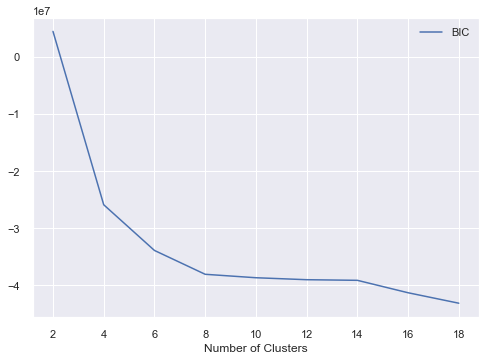

In [11]:

train0 = df2.drop(columns=['Start_Time'])
train0.reset_index(level=0, inplace=True)
train0.head()

scl_obj = StandardScaler()
scl_obj.fit(train0) 
train_fit = scl_obj.transform(train0)

train = pd.DataFrame(data=train_fit, columns=train0.columns)

models = [mixture.GaussianMixture(n, covariance_type='full', random_state=123).fit(train.drop(columns=drop_cols))
          for n in n_components]

plt.plot(n_components, [m.bic(train.drop(columns=drop_cols)) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('Number of Clusters');

In [12]:
def modeling_GMM(train0, n_clusters, drop_cols) :
    # Prep incoming data
    train0.reset_index(level=0, inplace=True)
    
    scl_obj = StandardScaler()
    scl_obj.fit(train0) 
    train_fit = scl_obj.transform(train0)
    
    # Initialize Gaussian Mixture
    GM = mixture.GaussianMixture(n_components=n_clusters,
                                 covariance_type='full',
                                 random_state=123,
                                 verbose=1)
    
    # Fit clusters
    gmm = GM.fit(train.drop(columns=drop_cols))
    
    # Get cluster labels
    labels = gmm.predict(train.drop(columns=drop_cols))
    
    # Get cluster probabilities
    prob = gmm.predict_proba(train.drop(columns=drop_cols))
    
    # Join cluster labels
    train2 = train.join(pd.DataFrame(data=labels, columns=['cluster']), how='left')
    
    # Join cluster probabilities
    prob_col_list = ['cluster'+str(n) for n in range(prob.shape[1]) ]
    train2 = train2.join(pd.DataFrame(data=prob, columns=prob_col_list), how='left')
    
    return train2

In [13]:
num_clusters = 8

In [14]:
train_in = df2.drop(columns=['Start_Time'])

train_out = modeling_GMM(train_in, n_clusters=num_clusters, drop_cols=drop_cols)

train2 = train_in.join(pd.DataFrame(data=train_out, columns=['cluster']), how='left')

# train2.head()

Initialization 0
Initialization converged: True


In [28]:
cluster_pct=train2['cluster'].value_counts(normalize=True)
cluster_pct_df=pd.DataFrame(cluster_pct)
cluster_pct_df.sort_index(inplace=True)
cluster_pct_dict=cluster_pct_df.T.to_dict("list")

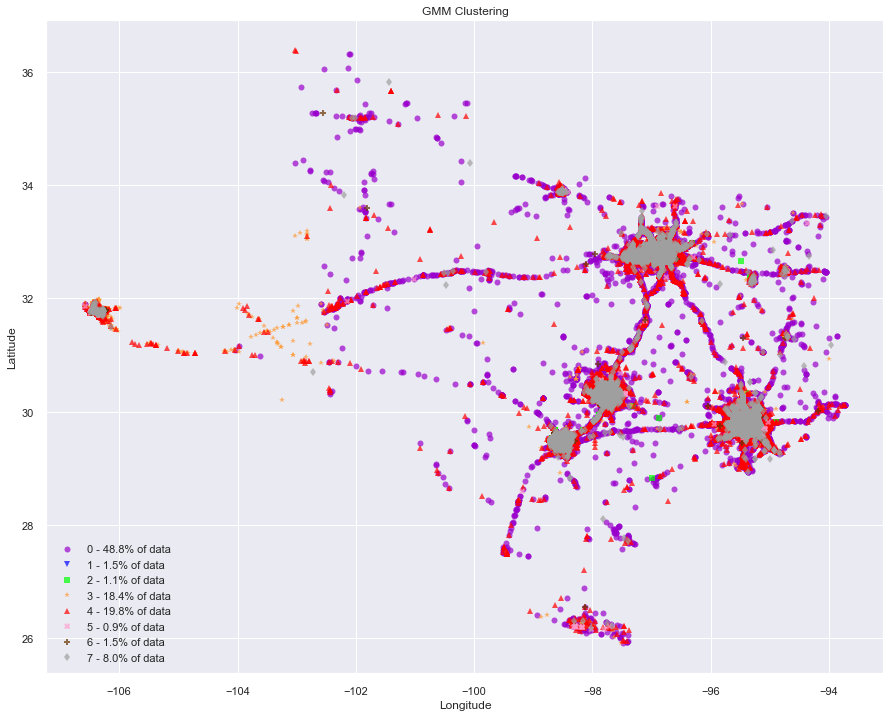

In [33]:
groups = train2.groupby("cluster")
markers = {0:'o', 1: 'v', 2: 's', 3: '*', 4:'^', 5:'X', 6:'P', 7:'d'}
colors = {0:'#9900cc', 1: '#0000ff', 2: '#00ff00', 3: '#ff9933', 4:'#ff0000', 5:'#ff99cc', 6:'#663300', 7:'#A0A0A0'}
plt.figure(figsize=(15,12))
for name, group in groups:
    label=str(name)+' - '+ str(round(cluster_pct_dict[name][0]*100,1))+'% of data'
    
    plt.plot(group["Start_Lng"], group["Start_Lat"], 
             marker=markers[name], 
             linestyle="", 
             label=label,
             c=colors[name], 
             alpha=.7)

plt.legend(loc=3)
plt.title('GMM Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Figure size 576x396 with 0 Axes>

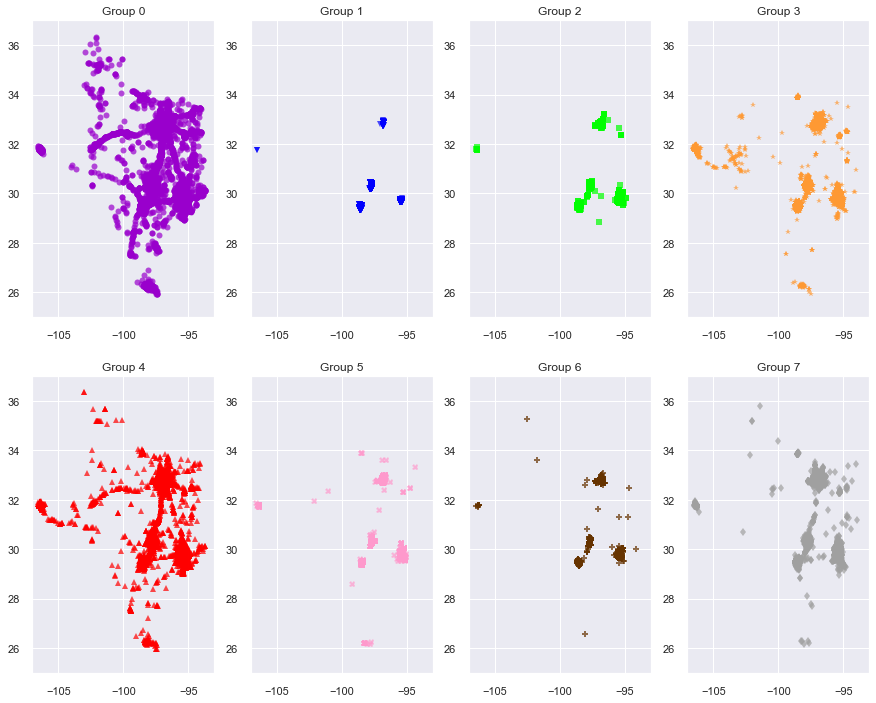

In [45]:
fig=plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,12))

x_axis = {0:0, 1:0, 2:0, 3:0, 4:1, 5:1, 6:1, 7:1}
y_axis = {0:0, 1:1, 2:2, 3:3, 4:0, 5:1, 6:2, 7:3}

for name, group in groups:
    
    y=y_axis[name]
    x=x_axis[name]
    
    axes[x,y].plot(group["Start_Lng"], group["Start_Lat"], 
             marker=markers[name], 
             linestyle="", 
             label=label,
             c=colors[name], 
             alpha=.7)
    
    axes[x,y].set_title("Group "+str(name))
    axes[x,y].set_xlim(-107,-93)
    axes[x,y].set_ylim(25,37)


In [17]:
means=groups.mean()

In [18]:
counts=groups.count()

In [19]:
means[['index']] = counts[['index']]
means = means.rename(columns={'index':'count'})
means = means[['count', 'Severity', 'Start_Lat', 'Start_Lng',
       'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)',
       'PointOfInterest', 'Bump', 'Crossing', 'Yield', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset_Day',
       'Sunrise_Sunset_Night']]

In [20]:
# pd.DataFrame(data=means.loc[0,:])
means

,count,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset_Day,Sunrise_Sunset_Night
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,142093,2.350059,30.927280,-96.744583,73.483342,61.990591,9.339606,0.001712,0.000000,0.000000,0.000000,0.000000,0.071024,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
1,4380,2.013927,30.216335,-97.455017,74.141621,60.545434,9.337995,0.006308,0.513242,0.000000,0.197489,0.000000,0.000457,0.000000,0.0,0.000000,1.000000,0.000000,0.004795,0.636986,0.0,0.826027,0.173973
2,3205,2.240874,30.299650,-96.313419,71.492793,66.550702,9.109407,0.008415,0.407488,0.012168,0.607488,0.494228,0.019345,0.083931,0.0,0.000000,0.000000,0.000000,0.023401,0.686427,0.0,0.683619,0.316381
3,53455,2.108372,30.650551,-98.199137,73.856709,57.416182,9.372394,0.001550,0.031092,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.888579,0.0,1.000000,0.000000
4,57720,2.388964,31.026329,-96.884699,63.696143,72.804037,9.236434,0.002135,0.000000,0.000000,0.000000,0.000000,0.067533,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.213877,0.0,0.000000,1.000000
5,2702,2.051443,30.494446,-96.187485,71.275833,65.715766,9.031421,0.005359,0.039230,0.000000,0.979645,0.002961,0.008882,0.001480,1.0,0.000000,0.053294,0.017765,0.000000,0.736491,0.0,0.801628,0.198372
6,4290,2.024709,29.990678,-95.875775,71.889254,67.031935,8.877669,0.005408,0.035897,0.003030,0.244056,0.011655,0.002331,0.006294,0.0,0.000000,0.008159,1.000000,0.003497,0.029837,0.0,0.838228,0.161772
7,23144,2.182942,31.051725,-96.542820,69.548315,71.629969,8.081993,0.055324,0.000043,0.000000,0.680738,0.000000,0.051547,0.000000,0.0,0.000475,0.000000,0.000000,0.000000,0.687306,0.0,0.780073,0.219927


In [21]:
dfw_coordinates = (-97.5,-96.5,32.2, 33.2)
# dfw_coordinates = (-.5,.3,1.1, 1.7)

In [22]:
dfw = train2[(train2["Start_Lng"]>=dfw_coordinates[0]) & (train2["Start_Lng"]<=dfw_coordinates[1]) &
            (train2["Start_Lat"]>=dfw_coordinates[2]) & (train2["Start_Lat"]<=dfw_coordinates[3])]

In [23]:
dfw_pct=dfw['cluster'].value_counts(normalize=True)
dfw_pct_df=pd.DataFrame(dfw_pct)
dfw_pct_df.sort_index(inplace=True)
dfw_pct_dict0=dfw_pct_df.T.to_dict("list")
# print(dfw_pct_dict0)

In [24]:
dfw_pct_dict={}

for k,v in cluster_pct_dict.items() :
    if k in dfw_pct_dict0:
        dfw_pct_dict[k]=dfw_pct_dict0[k]
    else:
        dfw_pct_dict[k]=[0.0]
    

# print(dfw_pct_dict)

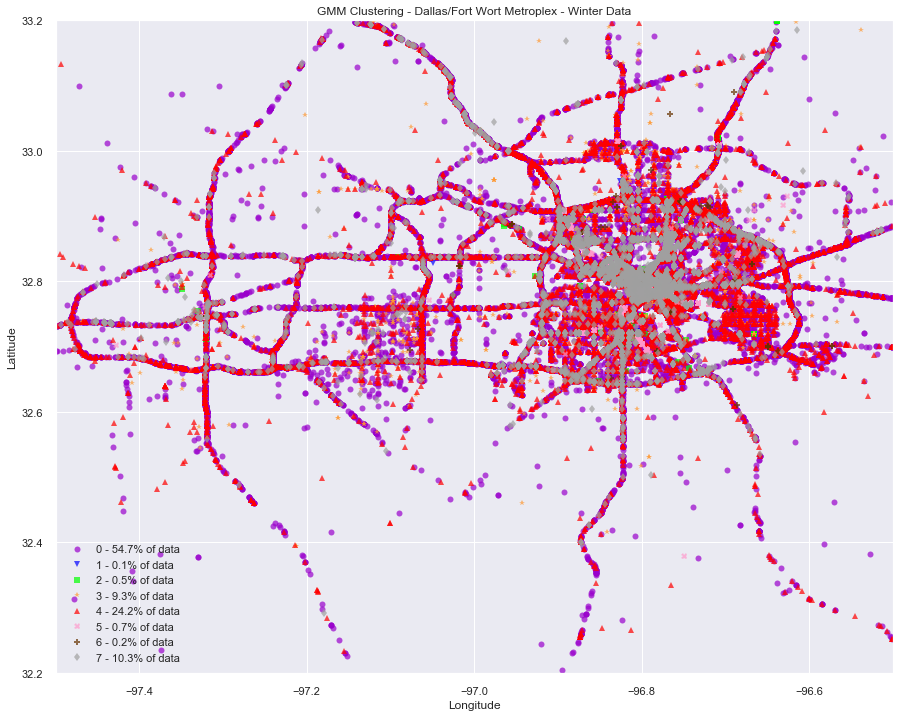

In [25]:
groups = dfw.groupby("cluster")
markers = {0:'o', 1: 'v', 2: 's', 3: '*', 4:'^', 5:'X', 6:'P', 7:'d'}
colors = {0:'#9900cc', 1: '#0000ff', 2: '#00ff00', 3: '#ff9933', 4:'#ff0000', 5:'#ff99cc', 6:'#663300', 7:'#A0A0A0'}
plt.figure(figsize=(15,12))
for name, group in groups:
    label=str(name)+' - '+ str(round(dfw_pct_dict[name][0]*100,1))+'% of data'
    
    plt.plot(group["Start_Lng"], group["Start_Lat"], 
             marker=markers[name], 
             linestyle="", 
             label=label,
             c=colors[name], 
             alpha=.7)

plt.legend(loc=3)
plt.axis(dfw_coordinates)
plt.title('GMM Clustering - Dallas/Fort Wort Metroplex')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Results

GMM created 8 clusterings of Texas accidents. We found 3 meaningful classifications based on those clusters: Highway Accidents, Suburban Accidents, and Urban Accidents.

#### Group 0 - Highway Accidents

The graph of Texas above shows that 48.8% of the accidents can be clustered into Group 0. We can categorize this cluster as follows:

* Occur along major highways
* Higher average severity
* Does not occur near traffic signals or crossings, but does occur near junctions

Thus we can conclude that these are Highway Accidents, occuring on the highway or where junctions occur. These are marginally more severe than other accidents.

#### Groups 3 and 4 - Suburban Accidents

Groups 3 and 4 account for 18.4% and 19.8% of accidents respectively. We can categroize these clusters as follows:

* Do not occur on major highways, unless in rural areas
* Group 3 occurs during the day while Group 4 occurs during the night
* Group 4 accidents are slightly more severe than Group 3
* Group 3 accidents occur at traffic signals at the highest frequency

We recommend combining these groups into one classification: Suburban Accidents. These are accidents occuring in populated areas, but not along highways. Many happen at traffic signals.


#### Group 7 - Urban Accidents

Group 7 accounts for 8.0% of all Texan accidents, but when we zoom into DFW, a major metropolitan area, that number increases to 10.3%. We can categorize this cluster as follows:

* Occur in downtown, urban areas
* High frequency of nearby crossings and traffic signals

We can classify these as Urban Accidents due to their locations and road characteristics.

#### Groups 1, 2, 5, and 6 - Miscellaneous Accidents

Groups 1, 2, 5, and 6 are small, altogether only accounting for 5% of Texas accidents. These clusters may not be meaningful, but we can glean some information from these:

* Group 1 occurs only at stations, including bus and train stations.
* Group 2 may involve pedestrian foot traffic, as they occur near points of interests and crossings where there is no exit for vehicles
* Group 5 occurs only near railways
* Group 6 occurs only near stop signs